In [2]:
require(tidyverse)
require(data.table)
require(ggplot2)
require(chromVAR)
require(SummarizedExperiment)
require(RColorBrewer)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)
# #https://rpubs.com/Koundy/71792 theme_Publication
require(ComplexHeatmap)
cols.hm.avg.tf <- colorRampPalette(c(rgb(249, 249, 212, maxColorValue = 255), rgb(60, 
    181, 195, maxColorValue = 255), rgb(30, 35, 86, maxColorValue = 255)), space = "Lab")

require(ggpubr)
require(gghighlight)
require(pheatmap)

theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}
require(ggrepel)

## 1.1 prom valcano

### 1.1.1 beta 

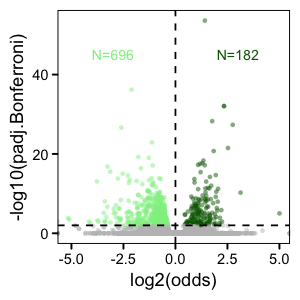

In [6]:
pd.fig2_prom_ttest_res <- fread('../dat/figdata/fig2_prom_ttest_res.csv')
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "beta") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2))) 
pd%>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(aes(col = as.factor(ty)), size = 1, alpha = 0.5,shape=16) + coord_cartesian(expand = T) + 
    theme_pubr() + theme(axis.ticks.length = unit(1, 
    "mm")) + geom_hline(yintercept = 2, color = "black", linetype = 2) + geom_vline(xintercept = 0, 
    color = "black", linetype = 2) + theme(legend.position = "none") + scale_color_manual(values = c('0'="grey", 
    "2"="darkgreen","1"="lightgreen")) + annotate(geom = "text", x = -3, y = 45, label =paste0("N=",table(pd$ty)[["1"]]), 
    size = 3,color="lightgreen",family = "Arial")+annotate(geom = "text", x = 3, y = 45, label =paste0("N=",table(pd$ty)[["2"]]), 
    size = 3,color="darkgreen",family = "Arial")

ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_beta_volcano.pdf",width = 2.5,height = 2.5,useDingbats=F)
# ggarrange(p3 %+% subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.2 alpha

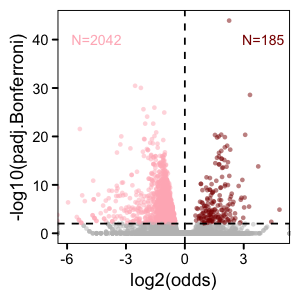

In [8]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "alpha") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2))) 
pd%>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(aes(col = as.factor(ty)), size = 1, alpha = 0.5,shape=16) + coord_cartesian(expand = T) + 
    theme_pubr() + theme(axis.ticks.length = unit(1, 
    "mm")) + geom_hline(yintercept = 2, color = "black", linetype = 2) + geom_vline(xintercept = 0, 
    color = "black", linetype = 2) + theme(legend.position = "none") + scale_color_manual(values = c('0'="grey", 
    "2"="darkred","1"="lightpink")) + annotate(geom = "text", x = -4.5, y = 40, label =paste0("N=",table(pd$ty)[["1"]]), 
    size = 3,color="lightpink",family = "Arial")+annotate(geom = "text", x = 4, y = 40, label =paste0("N=",table(pd$ty)[["2"]]), 
    size = 3,color="darkred",family = "Arial")

ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_alpha_volcano.pdf",width = 2.5,height = 2.5,useDingbats=F)
# ggarrange(p3 %+% subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.3 alpha + beta: annotation

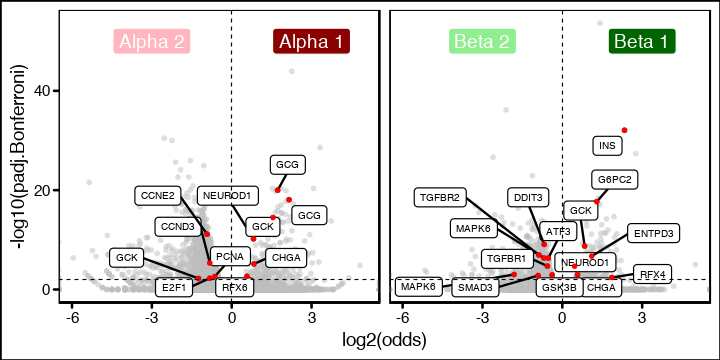

In [180]:

feature.glist <- list(alpha = list(alpha1 = c("CHGA", "GCG", "GCK", "NEUROD1", "RFX6"), 
    alpha2 = c("PCNA", "CCND3", "CCNE2", "E2F1")), beta = list(beta2 = c("ATF3", 
    "DDIT3", "FOXO1.", "TGFBR1", "TGFBR2", "SMAD3", "GSK3B", "MAPK6"), beta1 = c("INS", 
    "CHGA", "G6PC2", "GCK", "RFX4", "NEUROD1", "ENTPD3")))

p.base <- pd.fig2_prom_ttest_res %>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + 
    theme_base(base_size = 11, base_family = "Arial") + theme(axis.ticks.length = unit(1, 
    "mm"))

options(repr.plot.width = 6, repr.plot.height = 3)

p.base + gghighlight(((Gene %in% unlist(feature.glist$alpha) & celltype == "alpha") | 
    (Gene %in% unlist(feature.glist$beta) & celltype == "beta")) & (padj.Bonferroni < 
    0.01), label_key = Gene, label_params = list(size = 2)) + geom_point(col = "red", 
    size = 0.5) + geom_hline(yintercept = 2, color = "black", linetype = 2, size = .25) + 
    geom_vline(xintercept = 0, color = "black", linetype = 2, size = .25) + facet_wrap(~celltype) + 
    theme(strip.background = element_blank(), strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-3, 
    2^3, 2^-3, 2^3), padj.Bonferroni = 1e-50, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen"))

ggsave(filename = "fig_s.prom_volcano_anno_bio.pdf", width = 6, height = 3, useDingbats = F)


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


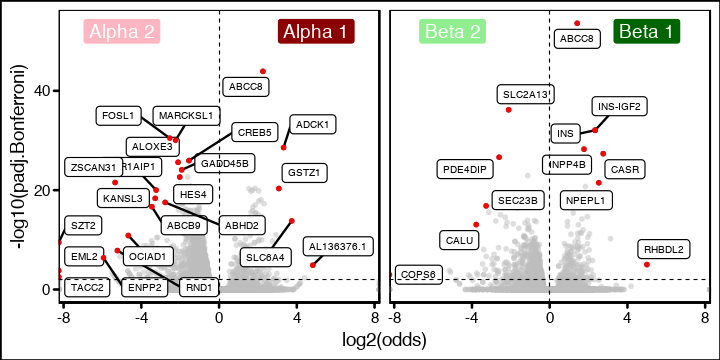

In [185]:
p.base + gghighlight(((-log10(padj.Bonferroni) - 4.5 * log2(odds) - 30 > 0) | (-log10(padj.Bonferroni) + 
    7.5 * log2(odds) - 40 > 0)) & padj.Bonferroni < 0.01, label_key = Gene, label_params = list(size = 2)) + 
    geom_point(col = "red", size = 0.5) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2, size = 0.25) + geom_vline(xintercept = 0, color = "black", linetype = 2, 
    size = 0.25) + facet_wrap(~celltype) + theme(strip.background = element_blank(), 
    strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-5, 
    2^5, 2^-5, 2^5), padj.Bonferroni = 1e-52, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen")) + coord_cartesian(xlim = c(-7.5, 
    7.5))

ggsave(filename = "fig_s.prom_volcano_anno_outliner.pdf", width = 6, height = 3, 
    useDingbats = F)

### 1.4 delta

In [23]:
pd <- fread('../dat/1901/res.transcript_level_delta.csv')
head(pd)

V1,pval,odds,type1_frac,type2_frac,FDR,padj.Bonferroni,FDR.BY
SAMD11_7,0.1439338,0.2937532,0.01744186,0.05714286,0.7106693,1,1
SAMD11_8,0.7417201,Inf,0.00872093,0.00000000,0.7682294,1,1
SAMD11_13,0.6343316,0.9656582,0.02761628,0.02857143,0.7140624,1,1
SAMD11_14,0.3046540,0.6067625,0.05377907,0.08571429,0.7106693,1,1
NOC2L_19,0.2425178,Inf,0.04069767,0.00000000,0.7106693,1,1
PLEKHN1_27,0.3289739,0.3503028,0.01017442,0.02857143,0.7106693,1,1


In [24]:
cat("range for padj.Bonferroni", range(pd$padj.Bonferroni),'\n')
cat("range for FDR",range(pd$FDR),'\n')
cat("range for pval",range(pd$pval),'\n')
cat("range for type1_frac",range(pd$type1_frac),'\n')
cat("range for type2_frac",range(pd$type2_frac),'\n')

range for padj.Bonferroni 0.309014 1 
range for FDR 0.1128344 0.9054609 
range for pval 1.666113e-05 0.9054609 
range for type1_frac 0 0.431686 
range for type2_frac 0 0.6285714 


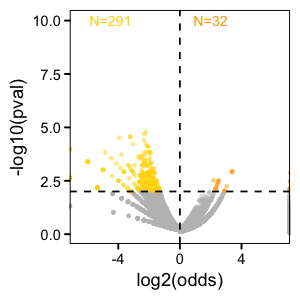

In [34]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd %>% mutate(ty = ifelse(pval >= 0.01, 0, ifelse(odds < 1, 1, 2)))
pd %>% ggplot(aes(log2(odds), -log10(pval))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T,xlim = c(-6.5,6.5)) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "orange", `1` = "gold")) + 
    annotate(geom = "text", x = -4.5, y = 10, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "gold", family = "Arial") + annotate(geom = "text", x = 2, 
    y = 10, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "orange", 
    family = "Arial")

 ggsave(filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_2.prom_delta_volcano_pval.pdf',width
 = 2.5,height = 2.5,useDingbats=F) 

In [26]:
head(pd %>% filter(ty==2))

V1,pval,odds,type1_frac,type2_frac,FDR,padj.Bonferroni,FDR.BY,ty
KDM4A_3691,0.007537498,Inf,0.1337209,0.00000000,0.5152482,1,1,2
KCNH1_10699,0.008939947,Inf,0.1293605,0.00000000,0.5490371,1,1,2
CDCA3_25805,0.001141532,10.53872,0.2369186,0.02857143,0.2866283,1,1,2
USP5_25805,0.001141532,10.53872,0.2369186,0.02857143,0.2866283,1,1,2
PYROXD1_26784,0.007537498,Inf,0.1337209,0.00000000,0.5152482,1,1,2
MTMR6_33599,0.009461444,Inf,0.1279070,0.00000000,0.5570838,1,1,2


## 1.2 prom GOterm

In [83]:
pd.go.res <- sapply(c("alpha1", "alpha2", "beta1", "beta2"), function(ct) {
    fn = paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/", 
        ct, ".EnrichR.BP.100less.csv")
    fread(fn)
}, simplify = F, USE.NAMES = T)

In [99]:
.all <=150) %>% arrange(Adjusted.P.value) %>% 
        top_n(-10, Adjusted.P.value))[1:2,c(1,5)]%>%mutate(glists=ct))

Term,Adjusted.P.value,glists
regulation of protein secretion (GO:0050708),0.0008138935,alpha1
regulation of peptide hormone secretion (GO:0090276),0.0020410744,alpha1


In [101]:
fwrite(pd,file = '../dat/figdata/fig2b_goterm.csv')
system("open ../dat/figdata/fig2b_goterm.csv ")

In [174]:
pd <- fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2b_goterm.csv") %>% 
    mutate(glists = factor(glists, levels = c("alpha2", "alpha1", "beta2", "beta1")))%>%
    group_by(glists)%>%arrange(Adjusted.P.value)%>%mutate(x=c(1,2))
pd

Term,Adjusted.P.value,glists,x
regulation of insulin secretion (GO:0050796),0.000003270,beta1,1
response to glucose (GO:0009749),0.000071800,beta1,2
protein modification (GO:0070646),0.000623640,alpha2,1
protein secretion (GO:0050708),0.000813893,alpha1,1
G2/M transition of mitotic cell cycle (GO:0010389),0.001170023,alpha2,2
peptide hormone secretion (GO:0090276),0.002041074,alpha1,2
response to stress (GO:0036003),0.046292878,beta2,1
response to insulin (GO:0032868),0.064444163,beta2,2


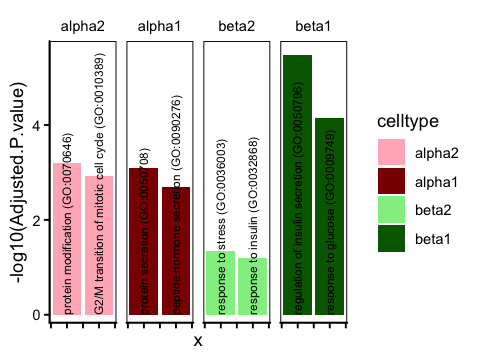

In [175]:
options(repr.plot.width = 4, repr.plot.height = 3)
p <- ggplot(pd, aes(x, -log10(Adjusted.P.value))) + geom_bar(stat = "identity", aes(fill = glists)) + 
    theme_pubr() + theme(axis.text.x = element_blank(), axis.line = element_line(colour = "black")) + 
    geom_text(aes(label = Term), y = 0.01, hjust = 0, color = "black", size = 2.5, 
        angle = 90) + facet_grid(. ~ glists, scales = "free_x") + scale_fill_manual(values = c("lightpink", 
    "darkred", "lightgreen", "darkgreen"), name = "celltype") + coord_cartesian(ylim=c(.1,5.5))
print(p)
ggsave( p+ylab("")+theme(legend.position = "none",strip.text = element_blank()),
       filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2B_GO.pdf',
 width = 4, height = 2)
#+ coord_flip(expand = F)

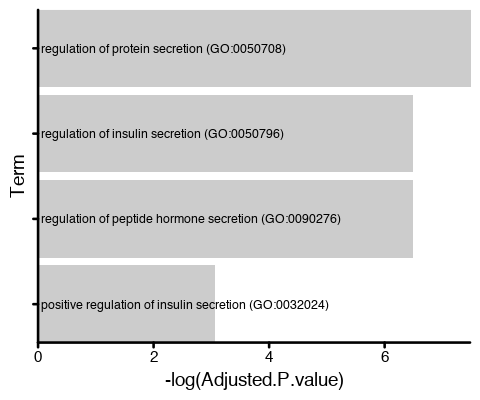

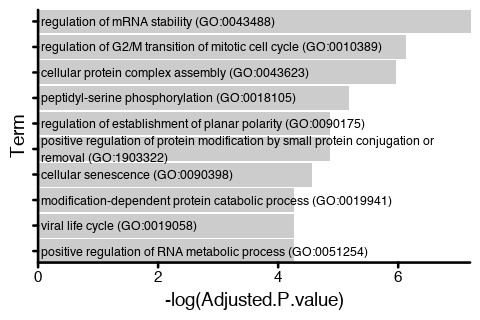

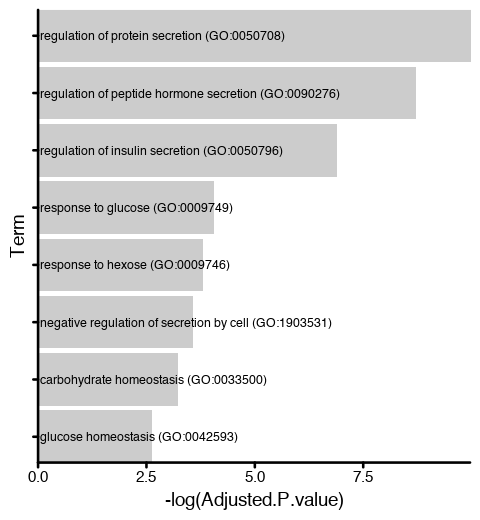

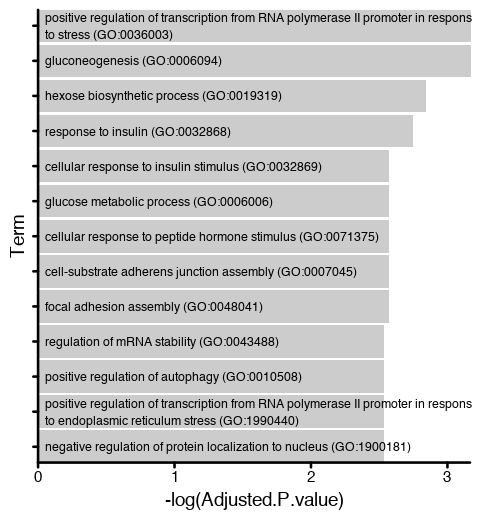

In [304]:

for (ct in c("alpha1", "alpha2", "beta1", "beta2")) {
    pd <- pd.go.res[[ct]] %>% filter(Adjusted.P.value <= 0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    print(p)
    ggsave(filename =paste0("fig_s.prom_",ct,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


if (F) {
    pd <- pd.go.res$alpha2 %>% filter(Adjusted.P.value <= 0.1) %>% arrange(Combined.Score) %>% 
        top_n(10, Combined.Score)
    l <- nrow(pd)
    ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, 60), levels = (stringr::str_wrap(Term, 
        60)))), aes(Term, Combined.Score)) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = T) + theme_pubr() + theme(axis.text.y = element_blank()) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
}

## 1.3 prom GSEA 

In [3]:
pd.gsea <- rbind(data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/Xin/GSEA_alpha_Xin_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/Xin/GSEA_beta_Xin_seed1000.csv"), 
    celltype = "beta")) %>% filter(grepl("_xin", Term))
pd.gsea$Term <- factor(pd.gsea$Term, levels = (pd.gsea %>% filter(celltype == "beta") %>% 
    arrange(desc(nes)))$Term)

pd.gsea <- pd.gsea %>% mutate(x = as.numeric(Term)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>%
    mutate(glists="Xin")
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))

pd.gsea

Term,es,nes,pval,fdr,cate,celltype,x,label,glists
Beta sub4_xin,-0.3081760,-1.6364018,0.00000000,0.0356718193,alpha_2,alpha,4,*,Xin
Beta sub3_xin,0.3980342,0.8645420,0.61001789,0.7005483483,alpha_1,alpha,2,,Xin
Beta sub1_xin,0.3736730,0.8920012,0.56905158,0.7546189266,alpha_1,alpha,3,,Xin
Beta sub2_xin,0.3236910,0.9311819,0.54115854,0.7937229727,alpha_1,alpha,1,,Xin
Beta sub4_xin,-0.3402836,-1.9633755,0.00000000,0.0006112469,beta_2,beta,4,**,Xin
Beta sub2_xin,0.5691745,1.5331913,0.02635046,0.0527259684,beta_1,beta,1,*,Xin
Beta sub3_xin,0.6432244,1.4212936,0.09037037,0.1027618364,beta_1,beta,2,,Xin
Beta sub1_xin,0.3590617,0.8264288,0.70046802,0.8643292683,beta_1,beta,3,,Xin


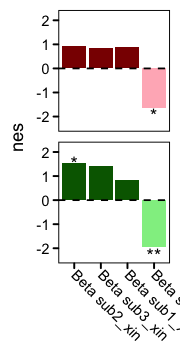

In [4]:
options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(pd.gsea, aes(Term, nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ .)+ylim(c(-2.4,2.2)) + theme_pubr() + scale_fill_manual(values = c("darkred", 
    "lightpink", "darkgreen", "lightgreen"), name = "celltype") + theme(strip.text = element_blank(),legend.position = "none",legend.text = element_text(family = "Arial", 
    size = 9), legend.title = element_text(family = "Arial", size = 10), axis.title.x = element_blank(), 
    axis.text.x = element_text(angle = -45, hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, 
    linetype = 2) + geom_text(data = pd.gsea.label,aes(label = label))
ggsave( filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2C_GSEA_summary.pdf',
 width = 1.5, height = 3)

In [5]:
pd.gsea.2 <- rbind(data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/our/GSEA_alpha_res_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/our/GSEA_beta_res_seed1000.csv"), 
    celltype = "beta")) %>% mutate(x = c(1, 2, 1, 2)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>% mutate(glists = "ours")

pd.gsea <- rbind(pd.gsea,pd.gsea.2)
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))

pd.gsea

Term,es,nes,pval,fdr,cate,celltype,x,label,glists
Beta sub4_xin,-0.3081760,-1.6364018,0.00000000,0.0356718193,alpha_2,alpha,4,*,Xin
Beta sub3_xin,0.3980342,0.8645420,0.61001789,0.7005483483,alpha_1,alpha,2,,Xin
Beta sub1_xin,0.3736730,0.8920012,0.56905158,0.7546189266,alpha_1,alpha,3,,Xin
Beta sub2_xin,0.3236910,0.9311819,0.54115854,0.7937229727,alpha_1,alpha,1,,Xin
Beta sub4_xin,-0.3402836,-1.9633755,0.00000000,0.0006112469,beta_2,beta,4,**,Xin
Beta sub2_xin,0.5691745,1.5331913,0.02635046,0.0527259684,beta_1,beta,1,*,Xin
Beta sub3_xin,0.6432244,1.4212936,0.09037037,0.1027618364,beta_1,beta,2,,Xin
Beta sub1_xin,0.3590617,0.8264288,0.70046802,0.8643292683,beta_1,beta,3,,Xin
Beta1,0.7876796,2.9266062,0.00000000,0.0000000000,alpha_1,alpha,1,**,ours
Beta2,-0.3002247,-1.6408528,0.00000000,0.0000000000,alpha_2,alpha,2,**,ours


In [6]:
pd.gsea <- pd.gsea%>% mutate(glists=factor(glists,levels=c("Xin",'ours')))


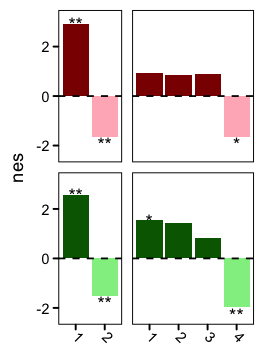

In [7]:
options(repr.plot.width = 2.2, repr.plot.height = 3)

p <- ggplot(pd.gsea, aes(as.factor(x), nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ glists, scales = "free_x", space = "free_x") + theme_pubr() + 
    scale_fill_manual(values = c("darkred", "lightpink", "darkgreen", "lightgreen"), 
        name = "celltype") + theme(strip.text = element_blank(), legend.position = "none", 
    legend.text = element_text(family = "Arial", size = 9), legend.title = element_text(family = "Arial", 
        size = 10), axis.title.x = element_blank(), axis.text.x = element_text(angle = -45, 
        hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, linetype = 2) + geom_text(data = pd.gsea.label, 
    aes(label = label)) + ylim(-2.4, 3.2)
print(p)
ggsave(p+theme(axis.title = element_blank(),axis.text.x = element_blank()),filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2C_GSEA_summary.pdf", 
    width = 132.759/72, height = 154.516/72)

In [29]:
pd.gsea <- rbind(data.frame(fread("/Users/frank/github/islet/data/dat/figdata/GSEA_alpha_Patchseq_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/github/islet/data/dat/figdata/GSEA_beta_Patchseq_seed1000.csv"), 
    celltype = "beta")) 
pd.gsea$Term <- factor(pd.gsea$Term, levels = (pd.gsea %>% filter(celltype == "beta") %>% 
    arrange(desc(nes)))$Term)
pd.gsea$Term <- factor(pd.gsea$Term, levels = c("ND_exocytosis_correlated", "ND_exocytosis_correlated_filtered", 
    "multi_correlated", "ND_exocytosis_anticorrelated", "ND_exocytosis_anticorrelated_filtered", 'mutli_anticorrelated',
    "T2D_exocytosis_anticorrelated", "T2D_exocytosis_correlated"))

In [36]:
pd.gsea <- rbind(data.frame(fread("/Users/frank/github/islet/data/dat/figdata/GSEA_alpha_Patchseq_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/github/islet/data/dat/figdata/GSEA_beta_Patchseq_seed1000.csv"), 
    celltype = "beta")) 
pd.gsea$Term <- factor(pd.gsea$Term, levels = (pd.gsea %>% filter(celltype == "beta") %>% 
    arrange(desc(nes)))$Term)

pd.gsea <- pd.gsea %>% mutate(x = as.numeric(Term)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>%
    mutate(glists="Patchseq")
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))

pd.gsea$Term <- factor(pd.gsea$Term, levels = c("ND_exocytosis_correlated", "ND_exocytosis_correlated_filtered", 
    "multi_correlated", "ND_exocytosis_anticorrelated", "ND_exocytosis_anticorrelated_filtered", 'mutli_anticorrelated',
    "T2D_exocytosis_anticorrelated", "T2D_exocytosis_correlated"))

pd.gsea%>% arrange(celltype,Term)

Term,es,nes,pval,fdr,geneset_size,matched_size,cate,celltype,x,label,glists
ND_exocytosis_correlated,0.2604949,1.0054631,0.463645943,0.46852843,311,282,alpha_1,alpha,3,,Patchseq
ND_exocytosis_correlated_filtered,0.2923870,1.0814783,0.340807175,0.49594849,182,167,alpha_1,alpha,2,,Patchseq
multi_correlated,0.3786343,1.2219791,0.180107527,0.38851107,57,54,alpha_1,alpha,1,,Patchseq
ND_exocytosis_anticorrelated,-0.2086777,-1.0484622,0.273972603,0.87235996,250,227,alpha_2,alpha,7,,Patchseq
ND_exocytosis_anticorrelated_filtered,-0.2160600,-1.0474233,0.340206186,0.58463422,191,175,alpha_2,alpha,6,,Patchseq
mutli_anticorrelated,-0.2549278,-0.9790483,0.496183206,0.63131313,54,51,alpha_2,alpha,8,,Patchseq
T2D_exocytosis_anticorrelated,-0.2021947,-1.0592016,0.250000000,1.00000000,449,423,alpha_2,alpha,4,,Patchseq
T2D_exocytosis_correlated,-0.1537263,-0.6316756,0.981981982,0.98898072,77,66,alpha_2,alpha,5,,Patchseq
ND_exocytosis_correlated,0.2987298,1.0184467,0.452165156,0.75628197,311,282,beta_1,beta,3,,Patchseq
ND_exocytosis_correlated_filtered,0.3584997,1.1957635,0.145833333,0.37058039,182,166,beta_1,beta,2,,Patchseq


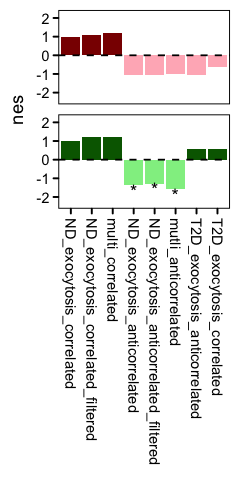

In [34]:
options(repr.plot.width = 2, repr.plot.height = 4)

ggplot(pd.gsea, aes(Term, nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ .)+ylim(c(-2.4,2.2)) + theme_pubr() + scale_fill_manual(values = c("darkred", 
    "lightpink", "darkgreen", "lightgreen"), name = "celltype") + theme(strip.text = element_blank(),legend.position = "none",legend.text = element_text(family = "Arial", 
    size = 9), legend.title = element_text(family = "Arial", size = 10), axis.title.x = element_blank(), 
    axis.text.x = element_text(angle = -90, hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, 
    linetype = 2) + geom_text(data = pd.gsea.label,aes(label = label))
#ggsave( filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/workReports/2019-08-05/fig_GSEA_patchseq.pdf',
# width = 1.5, height = 4)

In [52]:
head(gene_exp%>%filter(celltype=="alpha"))

gene_tr.idx,Gene,tr.idx,odds,padj.Bonferroni,celltype
SAMD11_7,SAMD11,7,0.5408936,1,alpha
SAMD11_13,SAMD11,13,0.6931602,1,alpha
SAMD11_14,SAMD11,14,0.4795206,1,alpha
NOC2L_19,NOC2L,19,0.8726655,1,alpha
KLHL17_23,KLHL17,23,0.8278814,1,alpha
PLEKHN1_27,PLEKHN1,27,0.4397100,1,alpha


In [49]:
length(unique(gene_exp$Gene))

[1] 15660

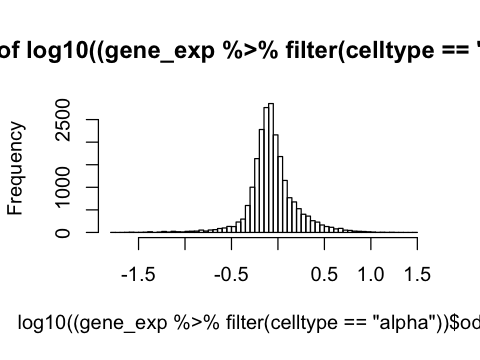

In [53]:
options(repr.plot.width = 4, repr.plot.height = 3)
hist(log10((gene_exp%>%filter(celltype=="alpha"))$odds),n=50)

## 1.4 prom pseudostate heatmap

In [ ]:
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps.Rds')
for (i in 1:8) fwrite(pd.fig2_prom_beta_ps$pd.enrichr.res[[i]]%>%arrange(P.value),paste0("beta_c",i,".csv"))

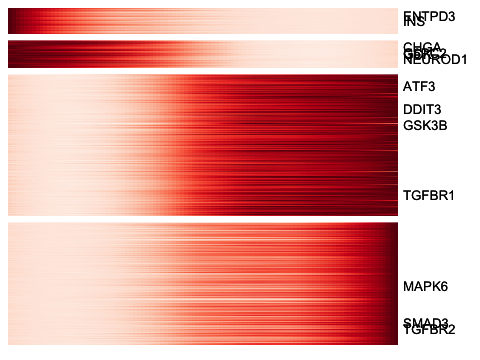

In [4]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps2.Rds')

feature.glist <- list(alpha = list(alpha1 = c("CHGA", "GCG", "GCK", "NEUROD1", "RFX6"), 
    alpha2 = c("PCNA", "CCND3", "CCNE2", "E2F1")), beta = list(beta2 = c("ATF3", 
    "DDIT3", "FOXO1.", "TGFBR1", "TGFBR2", "SMAD3", "GSK3B", "MAPK6"), beta1 = c("INS", 
    "CHGA", "G6PC2", "GCK", "RFX4", "NEUROD1", "ENTPD3")))

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_beta2.pdf",height = 3,width = 4,family = "Arial")
#print(p)
#dev.off()

In [21]:
fwrite(pd.fig2_prom_beta_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_beta_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_beta_ps_4clusters/fig_2C.prom_ps_heatmap_beta2.csv")


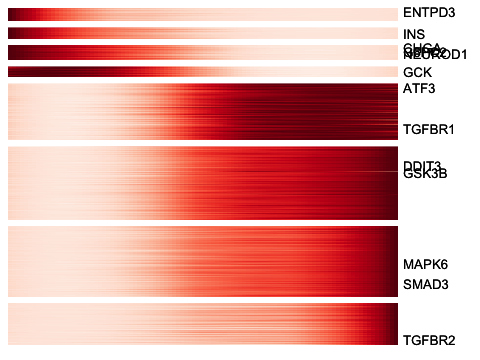

In [33]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps.Rds')

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:4, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 5:8, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_beta.pdf",height = 3,width = 4,family = "Arial")
#print(p)
#dev.off()

fwrite(pd.fig2_prom_beta_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_beta_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_beta_ps_8clusters/fig_2B.prom_ps_heatmap_beta.csv")


pdf 
  2

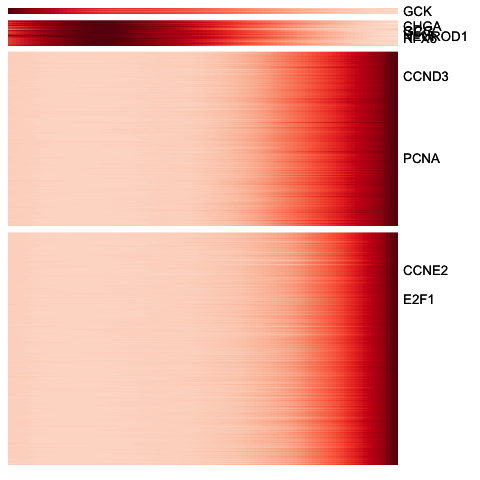

In [23]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_alpha_ps<- readRDS('../dat/figdata/fig2_prom_alpha_ps.Rds')

options(repr.plot.width=4, repr.plot.height=4)
row_labels<-(pd.fig2_prom_alpha_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$alpha$alpha1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$alpha$alpha2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_alpha_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_alpha_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_alpha.pdf",height = 4,width = 4,family = "Arial")
#print(p)
#dev.off()

fwrite(pd.fig2_prom_alpha_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_alpha_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_alpha_ps_cluster/fig_2C.prom_ps_heatmap_alpha.csv")


In [6]:

for (i in 1:8) {
    pd <- pd.fig2_prom_beta_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_beta_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


In [391]:
for (i in 1:4) {
    pd <- pd.fig2_prom_alpha_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_alpha_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}